<a href="https://colab.research.google.com/github/fboldt/isdog/blob/main/kaggle_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# from google.colab import files
# files.upload()

# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# !kaggle competitions download -c dog-breed-identification

# !unzip dog-breed-identification.zip

In [8]:
image_size = 180
batch_size = 32
seed = 42
validation_split=0.25
newdir = 'kaggle'

In [9]:
# import os, pathlib
# import shutil
# import pandas as pd

# train_ori = pathlib.Path('train')

# if not os.path.exists(newdir):
#     os.makedirs(newdir)
# kaggle = pathlib.Path(newdir)

# def move_images(image, label, dest_dir, source_dir):
#     _ = os.path.join(dest_dir, label)
#     if not os.path.exists(_):
#         os.makedirs(_)
#     source = os.path.join(source_dir, f'{image}.jpg')
#     destination = os.path.join(dest_dir, label, f'{image}.jpg')
#     if os.path.exists(source) and not os.path.exists(destination):
#         shutil.copyfile(source, destination)

# labels = pd.read_csv('./labels.csv').to_numpy()
# for image, label in labels:
#     move_images(image, label, kaggle, train_ori)

In [10]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(newdir,
                                             image_size=(image_size, image_size),
                                             validation_split=validation_split,
                                             subset="training",
                                             seed=seed,
                                             batch_size=batch_size)
validation_dataset = image_dataset_from_directory(newdir,
                                             image_size=(image_size, image_size),
                                             validation_split=validation_split,
                                             subset="validation",
                                             seed=seed,
                                             batch_size=batch_size)

Found 10222 files belonging to 120 classes.
Using 7667 files for training.
Found 10222 files belonging to 120 classes.
Using 2555 files for validation.


In [11]:
num_labels = len(train_dataset.class_names)

In [23]:
(train_dataset.element_spec[0].shape[1], 
 train_dataset.element_spec[0].shape[2], 
 train_dataset.element_spec[0].shape[3])

(180, 180, 3)

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)

conv_base = keras.applications.vgg16.VGG16(weights="imagenet", include_top=False)
conv_base.trainable = False

inputs = keras.Input(shape=(image_size, image_size, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)

x = layers.BatchNormalization()(x)
x = layers.GlobalMaxPooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_labels, activation='softmax')(x)
model = keras.Model(inputs, outputs)

model.compile(loss="sparse_categorical_crossentropy",
  optimizer="rmsprop",
  metrics=["accuracy"])

callbacks = [
  keras.callbacks.ModelCheckpoint(filepath="vgg16.x", save_best_only=True, monitor="val_loss"),
  keras.callbacks.EarlyStopping(monitor="val_loss", patience=1)
]

history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=callbacks)

58889256/58889256 [==============================] - 59s 1us/step
Epoch 1/30
240/240 [==============================] - ETA: 0s - loss: 10.3631 - accuracy: 0.0372INFO:tensorflow:Assets written to: vgg16.x/assets


INFO:tensorflow:Assets written to: vgg16.x/assets


240/240 [==============================] - 495s 2s/step - loss: 10.3631 - accuracy: 0.0372 - val_loss: 5.1007 - val_accuracy: 0.1859
Epoch 2/30
240/240 [==============================] - ETA: 0s - loss: 6.4939 - accuracy: 0.1201INFO:tensorflow:Assets written to: vgg16.x/assets


INFO:tensorflow:Assets written to: vgg16.x/assets


240/240 [==============================] - 507s 2s/step - loss: 6.4939 - accuracy: 0.1201 - val_loss: 3.3200 - val_accuracy: 0.3432
Epoch 3/30
240/240 [==============================] - ETA: 0s - loss: 4.8017 - accuracy: 0.2069INFO:tensorflow:Assets written to: vgg16.x/assets


INFO:tensorflow:Assets written to: vgg16.x/assets


240/240 [==============================] - 495s 2s/step - loss: 4.8017 - accuracy: 0.2069 - val_loss: 2.6092 - val_accuracy: 0.4321
Epoch 4/30
240/240 [==============================] - ETA: 0s - loss: 3.9313 - accuracy: 0.2674INFO:tensorflow:Assets written to: vgg16.x/assets


INFO:tensorflow:Assets written to: vgg16.x/assets


240/240 [==============================] - 495s 2s/step - loss: 3.9313 - accuracy: 0.2674 - val_loss: 2.3003 - val_accuracy: 0.4771
Epoch 5/30
240/240 [==============================] - ETA: 0s - loss: 3.2677 - accuracy: 0.3372INFO:tensorflow:Assets written to: vgg16.x/assets


INFO:tensorflow:Assets written to: vgg16.x/assets


240/240 [==============================] - 494s 2s/step - loss: 3.2677 - accuracy: 0.3372 - val_loss: 2.1157 - val_accuracy: 0.5143
Epoch 6/30
240/240 [==============================] - ETA: 0s - loss: 2.9183 - accuracy: 0.3751INFO:tensorflow:Assets written to: vgg16.x/assets


INFO:tensorflow:Assets written to: vgg16.x/assets


240/240 [==============================] - 495s 2s/step - loss: 2.9183 - accuracy: 0.3751 - val_loss: 1.9391 - val_accuracy: 0.5436
Epoch 7/30
240/240 [==============================] - ETA: 0s - loss: 2.6411 - accuracy: 0.4038INFO:tensorflow:Assets written to: vgg16.x/assets


INFO:tensorflow:Assets written to: vgg16.x/assets


240/240 [==============================] - 502s 2s/step - loss: 2.6411 - accuracy: 0.4038 - val_loss: 1.8396 - val_accuracy: 0.5624
Epoch 8/30
240/240 [==============================] - ETA: 0s - loss: 2.4616 - accuracy: 0.4275INFO:tensorflow:Assets written to: vgg16.x/assets


INFO:tensorflow:Assets written to: vgg16.x/assets


240/240 [==============================] - 511s 2s/step - loss: 2.4616 - accuracy: 0.4275 - val_loss: 1.7400 - val_accuracy: 0.5703
Epoch 9/30
240/240 [==============================] - ETA: 0s - loss: 2.2843 - accuracy: 0.4544

KeyboardInterrupt: 

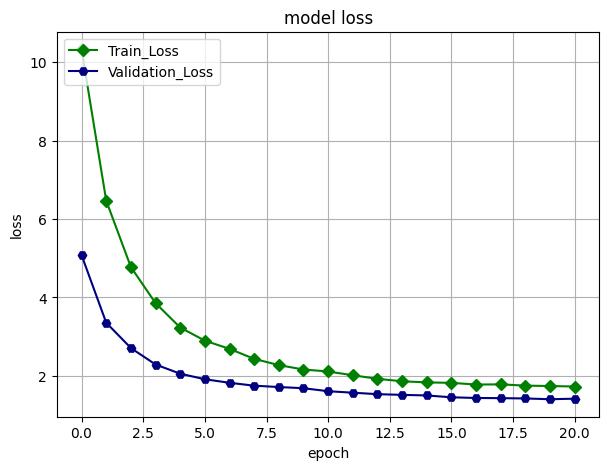

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],color="green",marker="D")
plt.plot(history.history['val_loss'],color="navy",marker="H")
plt.grid(True)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train_Loss', 'Validation_Loss'], loc='upper left')
plt.show()

In [ ]:
model = keras.models.load_model("vgg16.x")
model.evaluate(validation_dataset)